#IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#2.IMPORTING THE DATASET

In [ ]:
df = pd.read_csv('/content/IMDb Movies India.csv.zip', encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


#3.DATA PREPROCESSING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.dropna(inplace=True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


#4.DATA VISUALIZATION

🎥 Top 5 Longest Movies:
                        Name    Year Duration                     Genre  \
13398          Soul of Sand  (2010)   99 min  Drama, Mystery, Thriller   
7314         Karim Mohammed  (2018)   99 min                     Drama   
9120              Mehsampur  (2018)   99 min                     Drama   
3094   Chor Chor Super Chor  (2013)   99 min   Comedy, Drama, Thriller   
376                   Aamir  (2008)   99 min      Action, Crime, Drama   

       Rating   Votes              Director                Actor 1  \
13398     5.6      82   Sidharth Srinivasan  Dibyendu Bhattacharya   
7314      4.8      30    Pawan Kumar Sharma              Alka Amin   
9120      6.6      41  Kabir Singh Chowdhry               Chamkara   
3094      6.5     225            Rajesh. K.        Deepak Dobriyal   
376       7.7  10,862       Raj Kumar Gupta      Rajeev Khandelwal   

               Actor 2         Actor 3  
13398       Saba Joshi    Avtar Sahani  
7314       Veer Gujjar     

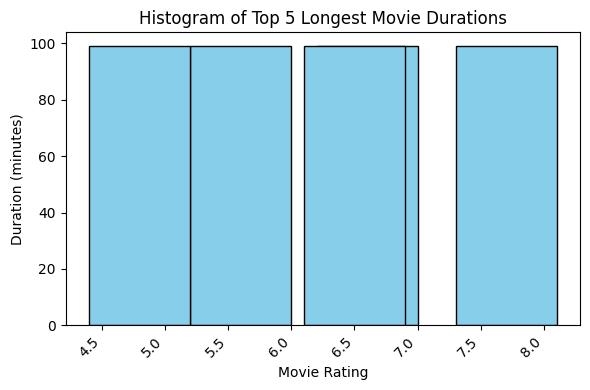

In [ ]:
# Get top 5 longest movies
top5 = df.sort_values(by='Duration', ascending=False).head(5)
print("🎥 Top 5 Longest Movies:\n", top5)

# Plot histogram for their durations
plt.figure(figsize=(6, 4))
plt.bar(top5['Rating'], top5['Duration'].str.replace(' min', '').astype(int), color='skyblue', edgecolor='black')
plt.title("Histogram of Top 5 Longest Movie Durations")
plt.xlabel("Movie Rating")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#5.SPLIT THE DATA

In [ ]:
# Remove commas from the 'Votes' column and convert it to numeric
df['Votes'] = df['Votes'].str.replace(',', '', regex=False).astype(int)

# Select 'Votes' as a DataFrame for X
X = df[['Votes']]
y = df[['Rating']]
X

,Votes
1,8
3,35
5,827
6,1086
8,326
...,...
15493,408
15494,1496
15503,44
15505,655


In [ ]:
y

,Rating
1,7.0
3,4.4
5,4.7
6,7.4
8,5.6
...,...
15493,6.1
15494,6.2
15503,5.8
15505,4.5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#6.TRAIN THE MODEL

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.values.ravel())

RandomForestRegressor(random_state=42)

#7.EVAULATE THE MODEL

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 2.1872236531265385
R-squared (R2) Score: -0.18116978972563103
